In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.io
from collections import Counter
import pandas as pd
import json
import random
import matplotlib.pyplot as plt
from itertools import chain
from scipy.interpolate import make_interp_spline
from scipy.stats import norm
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# from statsmodels.stats.multicomp import pairwise_gameshowell
# import pingouin as pg
from scipy.interpolate import make_interp_spline
from scipy import signal
import math
import matplotlib.font_manager as fm
from scipy.stats import sem
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import vonmises


In [2]:
def MemoryIndexbyTrl(hist_seq, port_seq):
    cosAng = np.cos([np.pi/4, 0, -np.pi/4, -np.pi/2, -3/4*np.pi, np.pi, 3/4*np.pi, np.pi/2])

    MITrl = np.zeros(8)  # Initialize an array to store the result

    if port_seq > 0:
        Projected_hist_seq_norm = hist_seq / np.nansum(hist_seq)
        Projected_hist_seq = np.roll(cosAng, int(port_seq) - 2) *Projected_hist_seq_norm
        MITrl = np.sum(Projected_hist_seq)
    else:
      MITrl=np.nan

    return MITrl

In [3]:
def circular_distance(angle1, angle2):
  angle_difference = np.abs(angle2 - angle1)
  wrapped_angle_difference = np.minimum(angle_difference, 2 * np.pi - angle_difference)
  return wrapped_angle_difference


In [27]:
Nshuffles=50000
MI1B_Shu=np.full((Nshuffles,5 ), np.nan)
MILags1B_Shu=np.full((Nshuffles,5 ), np.nan)
for n in range(Nshuffles):
  MI_1bump=[]
  MILags_1bump=[]
  for i in range(0,5):
    cosAng = np.cos([np.pi/4, 0, -np.pi/4, -np.pi/2, -3/4*np.pi, np.pi, 3/4*np.pi, np.pi/2])
    Ang=np.array([ -3/4*np.pi,-np.pi/2,-np.pi/4,0 , np.pi/4 ,np.pi/2,3/4*np.pi ,np.pi])
    AngRad_dict = {1: np.pi/4, 2: 0, 3: -np.pi/4, 4: -np.pi/2, 5: -3*np.pi/4, 6: np.pi, 7: 3*np.pi/4, 8: np.pi/2}
    # Define parameters for the first Von Mises distribution
    loc1 = Ang[3] # Mean angle for the first peak
    kappa1 = 2  # Concentration parameter (inverse of dispersion)

    loc2=Ang[0]
    kappa2=0.0000000001

    # Generate random samples from the first Von Mises distribution
    samples1 = vonmises.rvs(loc=loc1, kappa=kappa1, size=100)
    samples2 = vonmises.rvs(loc=loc2, kappa=kappa2, size=3000)

    combined_samples=np.concatenate((samples1, samples2))

    combined_samples=np.digitize(combined_samples, bins=Ang)
    port_counts = Counter(combined_samples)
    hist=np.array([port_counts[port] for port in AngRad_dict])
      # print(hist)
    MI_1bump.append(MemoryIndexbyTrl(hist, 4))

    MILags_1bump.append(MemoryIndexbyTrl(hist, 4+i))
  MI1B_Shu[n]=MI_1bump
  MILags1B_Shu[n]=MILags_1bump


In [36]:
MeanMI1B=np.array([np.mean(MI1B_Shu[:,i]) for i in range(5)])
MeanMILags1B=np.array([np.mean(MILags1B_Shu[:,i]) for i in range(5)])

Text(0, 0.5, 'Memory Index')

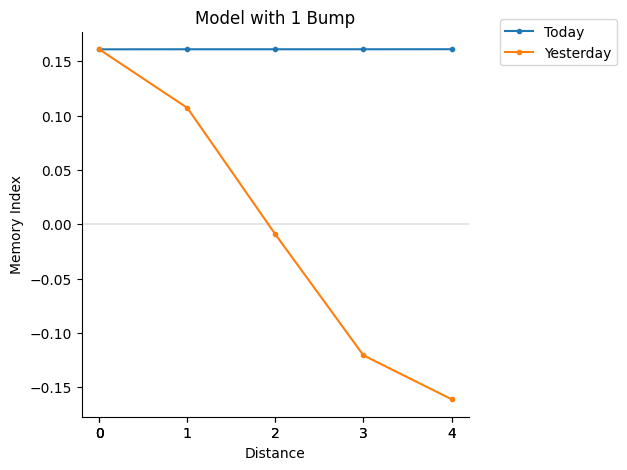

In [37]:
fig,axs=plt.subplots(figsize=(5,5))
axs.plot(MeanMI1B, '.-', label='Today')
axs.plot(MeanMILags1B, '.-',label='Yesterday')
axs.axhline(0, color='grey', alpha=0.2)
labelx=axs.get_xticks()
axs.set_xticks( labelx.astype(int))
axs.spines[['top', 'right']]. set_visible(False)
axs.set_title('Model with 1 Bump')
axs.legend(loc='upper right', bbox_to_anchor=(1.4,1.05))
axs.set_xlabel('Distance')
axs.set_ylabel('Memory Index')

In [117]:
np.arange(0,5)

array([0, 1, 2, 3, 4])

In [120]:
Nshuffles1=500
MI2B_SSurr=np.full((Nshuffles1,Nshuffles,5 ), np.nan)
MILags2B_SSurr=np.full((Nshuffles1,Nshuffles,5 ), np.nan)
for s in range(Nshuffles1):
  Nshuffles=500
  MI2B_S=np.full((Nshuffles,5 ), np.nan)
  MILags2B_S=np.full((Nshuffles,5 ), np.nan)
  for n in range(Nshuffles):
    MI_2b=[]
    MILags_2b=[]
    for i in range(0,5):
      cosAng = np.cos([np.pi/4, 0, -np.pi/4, -np.pi/2, -3/4*np.pi, np.pi, 3/4*np.pi, np.pi/2])
      Ang=np.array([ -3/4*np.pi,-np.pi/2,-np.pi/4,0 , np.pi/4 ,np.pi/2,3/4*np.pi ,np.pi])
      AngRad_dict = {1: np.pi/4, 2: 0, 3: -np.pi/4, 4: -np.pi/2, 5: -3*np.pi/4, 6: np.pi, 7: 3*np.pi/4, 8: np.pi/2}
      # Define parameters for the first Von Mises distribution
      loc1 = Ang[3] # Mean angle for the first peak
      kappa1 = 3 # Concentration parameter (inverse of dispersion)

      loc2 = Ang[3+i] # Mean angle for the first peak
      kappa2 = 5  # Concentration parameter (inverse of dispersion)


      loc3=Ang[0]
      kappa3=0.0000000001

      # Generate random samples from the first Von Mises distribution
      samples1 = vonmises.rvs(loc=loc1, kappa=kappa1, size=200)
      samples2 = vonmises.rvs(loc=loc2, kappa=kappa2, size=250)
      samples3 = vonmises.rvs(loc=loc3, kappa=kappa3, size=6000)

      combined_samples=np.concatenate((samples1, samples2, samples3))

      combined_samples=np.digitize(combined_samples, bins=Ang)
      port_counts = Counter(combined_samples)
      hist=np.array([port_counts[port] for port in AngRad_dict])
        # print(hist)
      j=np.arange(0,5)
      distance=np.random.choice(j)
      MI_2b.append(MemoryIndexbyTrl(hist, 4))
      MILags_2b.append(MemoryIndexbyTrl(hist, 4+distance))

    MI2B_S[n]=MI_2b
    MILags2B_S[n]=MILags_2b

  MI2B_SSurr[s]=MI2B_S
  MILags2B_SSurr[s]=MILags2B_S


In [132]:
meanShufflags2B=([np.mean(MILags2B_SSurr[:,:,i]) for i in range(5)])
Shuff2BCILags=np.array(([np.percentile(MILags2B_SSurr[:,:,i], [99.5,.5]) for i in range(5)]))
meanShuff2B=([np.mean(MI2B_SSurr[:,:,i]) for i in range(5)])
Shuff2BCI=np.array(([np.percentile(MI2B_SSurr[:,:,i], [99.5,.5]) for i in range(5)]))

In [112]:
MeanMI1B=np.array([np.mean(MI1B_Shu[:,i]) for i in range(5)])
MeanMILags1B=np.array([np.mean(MILags1B_Shu[:,i]) for i in range(5)])
MeanMI2B=np.array([np.mean(MI2B_Shu[:,i]) for i in range(5)])
MeanMILags2B=np.array([np.mean(MILags2B_Shu[:,i]) for i in range(5)])

sem1Bamb=np.array([np.nanstd(MI1B_Shu[:,i])/ np.sqrt(np.sum(MI1B_Shu[:,i])) for i in range(5)])
sem1BambLags=np.array([np.nanstd(MILags1B_Shu[:,i])/ np.sqrt(np.sum(MILags1B_Shu[:,i])) for i in range(5)])
sem2Bamb=np.array([np.nanstd(MI2B_Shu[:,i])/ np.sqrt(np.sum(MI2B_Shu[:,i])) for i in range(5)])
sem2BambLags=np.array([np.nanstd(MILags2B_Shu[:,i])/ np.sqrt(np.sum(MILags2B_Shu[:,i])) for i in range(5)])

std1Bamb=np.array([np.nanstd(MI1B_Shu[:,i]) for i in range(5)])
std1BambLags=np.array([np.nanstd(MILags1B_Shu[:,i]) for i in range(5)])
std2Bamb=np.array([np.nanstd(MI2B_Shu[:,i]) for i in range(5)])
std2BambLags=np.array([np.nanstd(MILags2B_Shu[:,i]) for i in range(5)])

<ipython-input-112-a0093735d121>:7: RuntimeWarning: invalid value encountered in sqrt
  sem1BambLags=np.array([np.nanstd(MILags1B_Shu[:,i])/ np.sqrt(np.sum(MILags1B_Shu[:,i])) for i in range(5)])
<ipython-input-112-a0093735d121>:9: RuntimeWarning: invalid value encountered in sqrt
  sem2BambLags=np.array([np.nanstd(MILags2B_Shu[:,i])/ np.sqrt(np.sum(MILags2B_Shu[:,i])) for i in range(5)])


(-0.4, 0.4)

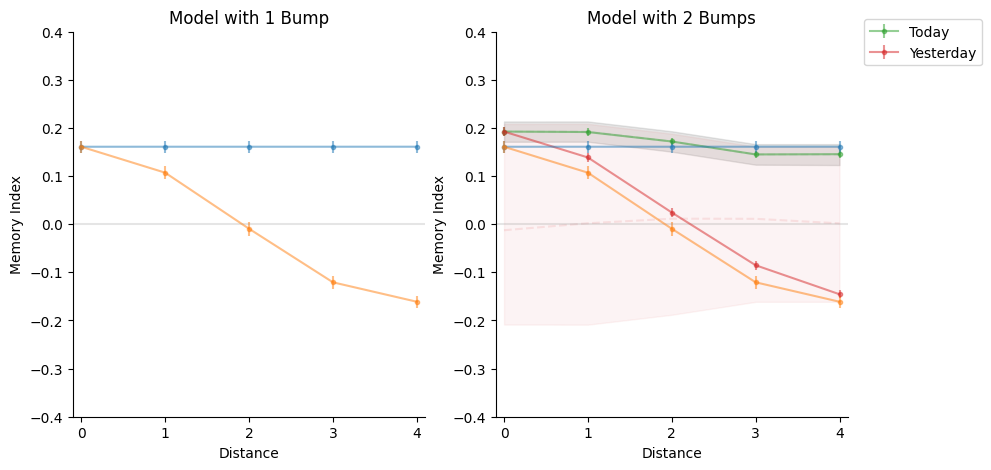

In [141]:
fig,axs=plt.subplots(1,2, figsize=(10,5))
indexes=np.arange(0,5)
axs[0].errorbar(indexes,MeanMI1B, yerr=std1Bamb, fmt='.-', alpha=0.5 )
axs[0].errorbar(indexes,MeanMILags1B, yerr=std1BambLags, fmt='.-', alpha=0.5 )
axs[0].axhline(0, color='grey', alpha=0.2)
labelx=axs[0].get_xticks()
axs[0].set_xticks( labelx.astype(int))
axs[0].spines[['top', 'right']]. set_visible(False)
axs[0].set_title('Model with 1 Bump')
axs[0].set_xlim(-0.1,4.1)
axs[0].set_ylim(-0.4, 0.4)
axs[0].set_xlabel('Distance')
axs[0].set_ylabel('Memory Index')

axs[1].errorbar(indexes,MeanMI2B, yerr=std2Bamb, fmt='.-', alpha=0.5,  label='Today', color='tab:green' )
axs[1].errorbar(indexes,MeanMILags2B, yerr=std2BambLags, fmt='.-', alpha=0.5 ,  label='Yesterday', color='tab:red')
axs[1].errorbar(indexes,MeanMI1B, yerr=std1Bamb, fmt='.-', alpha=0.5, color='tab:blue' )
axs[1].errorbar(indexes,MeanMILags1B, yerr=std1BambLags, fmt='.-', alpha=0.5 ,  color='tab:orange')
axs[1].plot(meanShuff2B, '--' ,color='grey', alpha=0.1)
axs[1].fill_between(indexes, Shuff2BCI[:,0],  Shuff2BCI[:,1], color='grey', alpha=0.2)
axs[1].plot(meanShufflags2B, '--' ,color='tab:red', alpha=0.1)
axs[1].fill_between(indexes, Shuff2BCILags[:,0],  Shuff2BCILags[:,1], color='tab:red', alpha=0.05)

# axs[1].plot(MeanMI2B, '.-', label='Today', alpha=0.5)
# axs[1].plot(MeanMILags2B, '.-',label='Yesterday', alpha=0.5)
axs[1].axhline(0, color='grey', alpha=0.2)
labelx=axs[1].get_xticks()
axs[1].set_xticks( labelx.astype(int))
axs[1].spines[['top', 'right']]. set_visible(False)
axs[1].set_title('Model with 2 Bumps')
axs[1].legend(loc='upper right', bbox_to_anchor=(1.4,1.05))
axs[1].set_xlabel('Distance')
axs[1].set_ylabel('Memory Index')
axs[1].set_xlim(-0.1,4.1)
axs[1].set_ylim(-0.4, 0.4)


In [265]:
NShuffles=5000
MIndSurr=np.full((NShuffles, 2, 5), np.nan)
# hist_=np.full((NShuffles, 5, 8), np.nan)
for n in range(NShuffles):
  MI=[]
  MILags=[]
  # hist_all=[]

  for i in range(0,5):
    cosAng = np.cos([np.pi/4, 0, -np.pi/4, -np.pi/2, -3/4*np.pi, np.pi, 3/4*np.pi, np.pi/2])
    Ang=np.array([ -3/4*np.pi,-np.pi/2,-np.pi/4,0 , np.pi/4 ,np.pi/2,3/4*np.pi ,np.pi])
    AngRad_dict = {1: np.pi/4, 2: 0, 3: -np.pi/4, 4: -np.pi/2, 5: -3*np.pi/4, 6: np.pi, 7: 3*np.pi/4, 8: np.pi/2}
    # Define parameters for the first Von Mises distribution
    loc1 = Ang[3] # Mean angle for the first peak
    kappa1 = 0.4  # Concentration parameter (inverse of dispersion)

    # Define parameters for the second Von Mises distribution
    loc2 = Ang[3+i] # Mean angle for the second peak (180 degrees)
    kappa2 =0.02  # Concentration parameter for the second peak
    # num_bins=9


    # Generate random samples from the first Von Mises distribution
    samples1 = vonmises.rvs(loc=loc1, kappa=kappa1, size=2000)
    # discretized_samples1 = np.digitize(samples1, np.linspace(-np.pi, np.pi, num_bins ))
    # discretized_samples1_ang=Ang[discretized_samples1]

    # Generate random samples from the second Von Mises distribution
    samples2 = vonmises.rvs(loc=loc2, kappa=kappa2, size=1000)
    # # discretized_samples2 = np.digitize(samples2, np.linspace(-np.pi, np.pi, num_bins ))
    # discretized_samples2_ang=Ang[discretized_samples2]


    # Combine the samples from both distributions
    # combined_samples = np.concatenate((discretized_samples1_ang, discretized_samples2_ang))
    combined_samples = np.concatenate((samples1, samples2))

    # fig,axs=plt.subplots(figsize=(5,5))
    # # Plot the histogram of the combined samples
    # axs.hist(combined_samples,bins=8, density=True, alpha=0.5, color='grey', align='mid')

    # Plot the probability density function (PDF) of each individual Von Mises distribution
    # x = np.linspace(-3, 4, 1000)
    # pdf1 = vonmises.pdf(x, loc=loc1, kappa=kappa1)
    # pdf2 = vonmises.pdf(x, loc=loc2, kappa=kappa2)
    # pdf1 /= np.trapz(pdf1, x)
    # pdf2 /= np.trapz(pdf2, x)

    # axs.plot(x, pdf1, label='Histogram Count \nfor Todays Port', color='tab:blue', alpha=0.4)
    # axs.plot(x, pdf2, label='Histogram Count \nfor Yesterdays Port', color='tab:orange', alpha=0.4)

    # axs.set_xticks(Ang-0.5, [-3,-2,-1,0,1,2,3,4])
    # axs.set_xlabel('Port Number')
    # axs.set_ylabel('Density')
    # axs.set_title('2 Bumps distance Model')
    # axs.legend(loc='upper left', bbox_to_anchor=(1,1))
    # bin_edges=

    combined_samples=np.digitize(combined_samples, bins=Ang)
    port_counts = Counter(combined_samples)
    hist=np.array([port_counts[port] for port in AngRad_dict])
    # print(hist)
    port_Num=np.array([1,2,3,4,5,6,7,8])
    port=np.random.choice(port_Num)
    MI.append(MemoryIndexbyTrl(hist, port))

    # new_randPorts=[AngRad_dict[i] for i in new_port_seq]

    # random.shuffle(new_port_seq)
    # shuffle_randPorts=[AngRad_dict[i] for i in new_port_seq]

    # new_distances=[circular_distance(new_randPorts[i],shuffle_randPorts[i])*8/(2*np.pi) for i in range(len(new_randPorts))]
    # distance_seq=new_distances
    # new_port_seq=np.array(new_port_seq)

    # sess0=np.array(distance_seq)==0.0
    # sess1=np.array(distance_seq)==1.0
    # sess2=np.array(distance_seq)==2.0
    # sess3=np.array(distance_seq)==3.0
    # sess4=np.array(distance_seq)==4.0

    # ## I am centering all the histograms to the 8th port and adding them in a big histogram
    # big_hist0=np.sum([np.roll(Hist_data[sess0][ss],8-int(new_port_seq[sess0][ss]), axis=0) for ss in range(len(Hist_data[sess0]))], axis=0)
    # big_hist1=np.sum([np.roll(Hist_data[sess1][ss],8-int(new_port_seq[sess1][ss]), axis=0) for ss in range(len(Hist_data[sess1]))], axis=0)
    # big_hist2=np.sum([np.roll(Hist_data[sess2][ss],8-int(new_port_seq[sess2][ss]), axis=0) for ss in range(len(Hist_data[sess2]))], axis=0)
    # big_hist3=np.sum([np.roll(Hist_data[sess3][ss],8-int(new_port_seq[sess3][ss]), axis=0) for ss in range(len(Hist_data[sess3]))], axis=0)
    # big_hist4=np.sum([np.roll(Hist_data[sess4][ss],8-int(new_port_seq[sess4][ss]), axis=0) for ss in range(len(Hist_data[sess4]))], axis=0)

    # ## I am ccomputing now the MI of that big Hist with correct port as 8 in all the cases
    # MI_Surr0=MemoryIndexbyTrl(big_hist0, 8)
    # MI_Surr1=MemoryIndexbyTrl(big_hist1, 8)
    # MI_Surr2=MemoryIndexbyTrl(big_hist2, 8)
    # MI_Surr3=MemoryIndexbyTrl(big_hist3, 8)
    # MI_Surr4=MemoryIndexbyTrl(big_hist4, 8)

    # MIs_distances_REC=np.array([MI_Surr0, MI_Surr1,MI_Surr2,MI_Surr3, MI_Surr4])


    port_yes=np.random.choice(port_Num)
    MILags.append(MemoryIndexbyTrl(hist, port+i))
    # hist_all.append(hist)
  MIndSurr[n]=np.array([MI, MILags])
  # hist_[n]=np.array(hist_all)

In [ ]:
def surrogates_24h_big_Hist(hist_seq, port_seq):
  ## takes  the distance, the matrix of the histograms, the list of ports and the trl
  Hist_data = np.array(list(chain.from_iterable(hist_seq)))
  new_port_seq=list(chain.from_iterable(port_seq))
  new_randPorts=[AngRad_dict[i] for i in new_port_seq]

  random.shuffle(new_port_seq)
  shuffle_randPorts=[AngRad_dict[i] for i in new_port_seq]

  new_distances=[circular_distance(new_randPorts[i],shuffle_randPorts[i])*8/(2*np.pi) for i in range(len(new_randPorts))]
  distance_seq=new_distances
  new_port_seq=np.array(new_port_seq)

  sess0=np.array(distance_seq)==0.0
  sess1=np.array(distance_seq)==1.0
  sess2=np.array(distance_seq)==2.0
  sess3=np.array(distance_seq)==3.0
  sess4=np.array(distance_seq)==4.0

  ## I am centering all the histograms to the 8th port and adding them in a big histogram
  big_hist0=np.sum([np.roll(Hist_data[sess0][ss],8-int(new_port_seq[sess0][ss]), axis=0) for ss in range(len(Hist_data[sess0]))], axis=0)
  big_hist1=np.sum([np.roll(Hist_data[sess1][ss],8-int(new_port_seq[sess1][ss]), axis=0) for ss in range(len(Hist_data[sess1]))], axis=0)
  big_hist2=np.sum([np.roll(Hist_data[sess2][ss],8-int(new_port_seq[sess2][ss]), axis=0) for ss in range(len(Hist_data[sess2]))], axis=0)
  big_hist3=np.sum([np.roll(Hist_data[sess3][ss],8-int(new_port_seq[sess3][ss]), axis=0) for ss in range(len(Hist_data[sess3]))], axis=0)
  big_hist4=np.sum([np.roll(Hist_data[sess4][ss],8-int(new_port_seq[sess4][ss]), axis=0) for ss in range(len(Hist_data[sess4]))], axis=0)

  ## I am ccomputing now the MI of that big Hist with correct port as 8 in all the cases
  MI_Surr0=MemoryIndexbyTrl(big_hist0, 8)
  MI_Surr1=MemoryIndexbyTrl(big_hist1, 8)
  MI_Surr2=MemoryIndexbyTrl(big_hist2, 8)
  MI_Surr3=MemoryIndexbyTrl(big_hist3, 8)
  MI_Surr4=MemoryIndexbyTrl(big_hist4, 8)

  MIs_distances_REC=np.array([MI_Surr0, MI_Surr1,MI_Surr2,MI_Surr3, MI_Surr4])
  return MIs_distances_REC

In [267]:
MISurr=[np.mean(MIndSurr[:,0, i]) for i in range(5)]
MILagsSurr=[np.mean(MIndSurr[:,1, i]) for i in range(5)]

In [271]:
MISurrCI=np.array([np.percentile(MIndSurr[:,0, i], [99.5, .5])for i in range(5)])
MILagsSurrCI=np.array([np.percentile(MIndSurr[:,1, i], [99.5, .5])for i in range(5)])

(-0.4, 0.4)

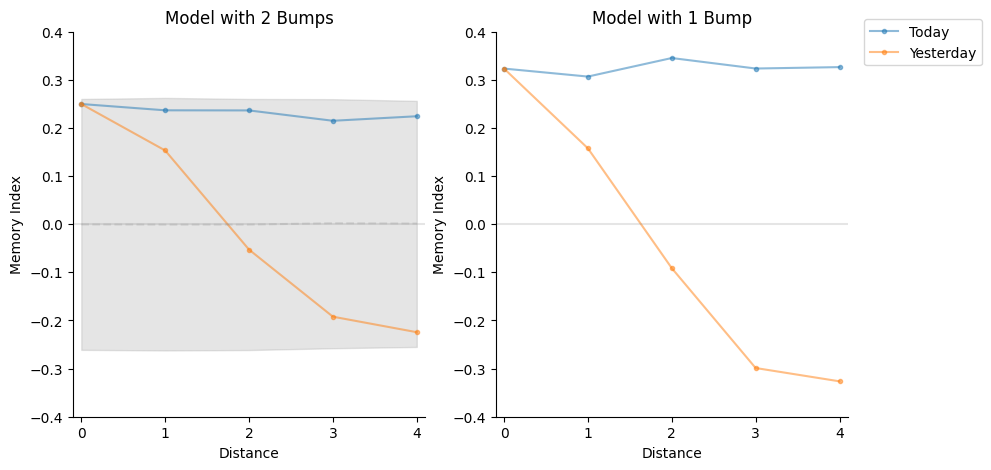

In [286]:
fig,axs=plt.subplots(1,2, figsize=(10,5))
x=np.arange(0,5)
axs[0].plot(MI, '.-', alpha=0.5)
axs[0].plot(MILags, '.-', alpha=0.5)
axs[0].axhline(0, color='grey', alpha=0.2)
axs[0].plot(MISurr, '--', color='grey', alpha=0.2)
axs[0].fill_between(x,MISurrCI[:,0], MISurrCI[:,1] , color='grey', alpha=0.2)
# axs[0].plot(MILagsSurr, '--', color='tab:orange', alpha=0.2)
labelx=axs[0].get_xticks()
axs[0].set_xticks( labelx.astype(int))
axs[0].spines[['top', 'right']]. set_visible(False)
axs[0].set_title('Model with 2 Bumps')
axs[0].set_xlim(-0.1,4.1)
axs[0].set_ylim(-0.4, 0.4)
axs[0].set_xlabel('Distance')
axs[0].set_ylabel('Memory Index')

axs[1].plot(MI_1bump, '.-', label='Today', alpha=0.5)
axs[1].plot(MILags_1bump, '.-',label='Yesterday', alpha=0.5)
axs[1].axhline(0, color='grey', alpha=0.2)
labelx=axs[1].get_xticks()
axs[1].set_xticks( labelx.astype(int))
axs[1].spines[['top', 'right']]. set_visible(False)
axs[1].set_title('Model with 1 Bump')
axs[1].legend(loc='upper right', bbox_to_anchor=(1.4,1.05))
axs[1].set_xlabel('Distance')
axs[1].set_ylabel('Memory Index')
axs[1].set_xlim(-0.1,4.1)
axs[1].set_ylim(-0.4, 0.4)
